In [2]:
import glob

glob.glob("**/df_final2.csv", recursive=True)


['df_final2.csv']

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo para las gráficas
sns.set(style="whitegrid", context="notebook")

# 1) Carga (ajusta la ruta si tu CSV está en otra carpeta)
df = pd.read_csv('df_final5.csv')

# 2) Limpieza de nombres y tipos
df.columns = [c.strip() for c in df.columns]  # quita espacios en los extremos
if "Total" in df.columns:
    df = df.rename(columns={"Total": "total"})

# Asegurar numéricos (si hay celdas vacías o texto, se convierten a NaN)
for col in ["pm25", "no2", "total"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 3) Dataset filtrado para análisis (dropna solo en las 3 variables que nos importan)
df_plot = df.dropna(subset=["pm25", "no2", "total"]).copy()

# (Opcional) Por si quieres títulos con la primera letra en mayúscula de ciudad
df_plot["ciudad"] = df_plot["ciudad"].str.title()

# Inspección rápida
df_plot.info()
df_plot.head()


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 42
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ciudad                            36 non-null     object 
 1   pm25                              36 non-null     float64
 2   no2                               36 non-null     float64
 3   Diagnóstico principal (CIE10MC)   36 non-null     object 
 4   Total Nacional                    36 non-null     object 
 5   Comunidades y Ciudades Autónomas  36 non-null     object 
 6   total                             36 non-null     float64
 7   comunidad_norm                    36 non-null     object 
dtypes: float64(3), object(5)
memory usage: 2.5+ KB


,ciudad,pm25,no2,Diagnóstico principal (CIE10MC),Total Nacional,Comunidades y Ciudades Autónomas,total,comunidad_norm
0,Vitoria,8.31,3.69,1000 ENFERMEDADES DEL SISTEMA RESPIRATORIO J00...,Total Nacional,16 País Vasco,1208.0,pais vasco
1,Alicante,9.00,0.50,1000 ENFERMEDADES DEL SISTEMA RESPIRATORIO J00...,Total Nacional,10 Comunitat Valenciana,1211.0,comunitat valenciana
2,Almeria,14.00,6.40,1000 ENFERMEDADES DEL SISTEMA RESPIRATORIO J00...,Total Nacional,01 Andalucía,791.0,andalucia
3,Oviedo,5.00,9.20,1000 ENFERMEDADES DEL SISTEMA RESPIRATORIO J00...,Total Nacional,"03 Asturias, Principado de",1463.0,"asturias, principado de"
5,Barcelona,34.00,20.20,1000 ENFERMEDADES DEL SISTEMA RESPIRATORIO J00...,Total Nacional,09 Cataluña,1438.0,cataluna


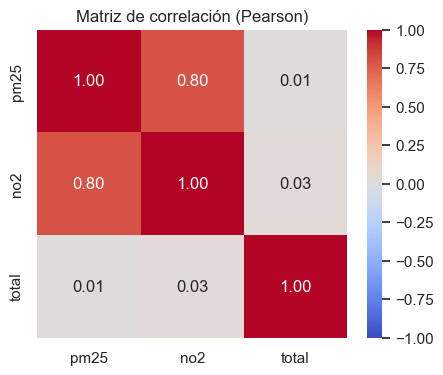

In [15]:
corr = df_plot[["pm25", "no2", "total"]].corr(method="pearson")
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación (Pearson)")
plt.show()

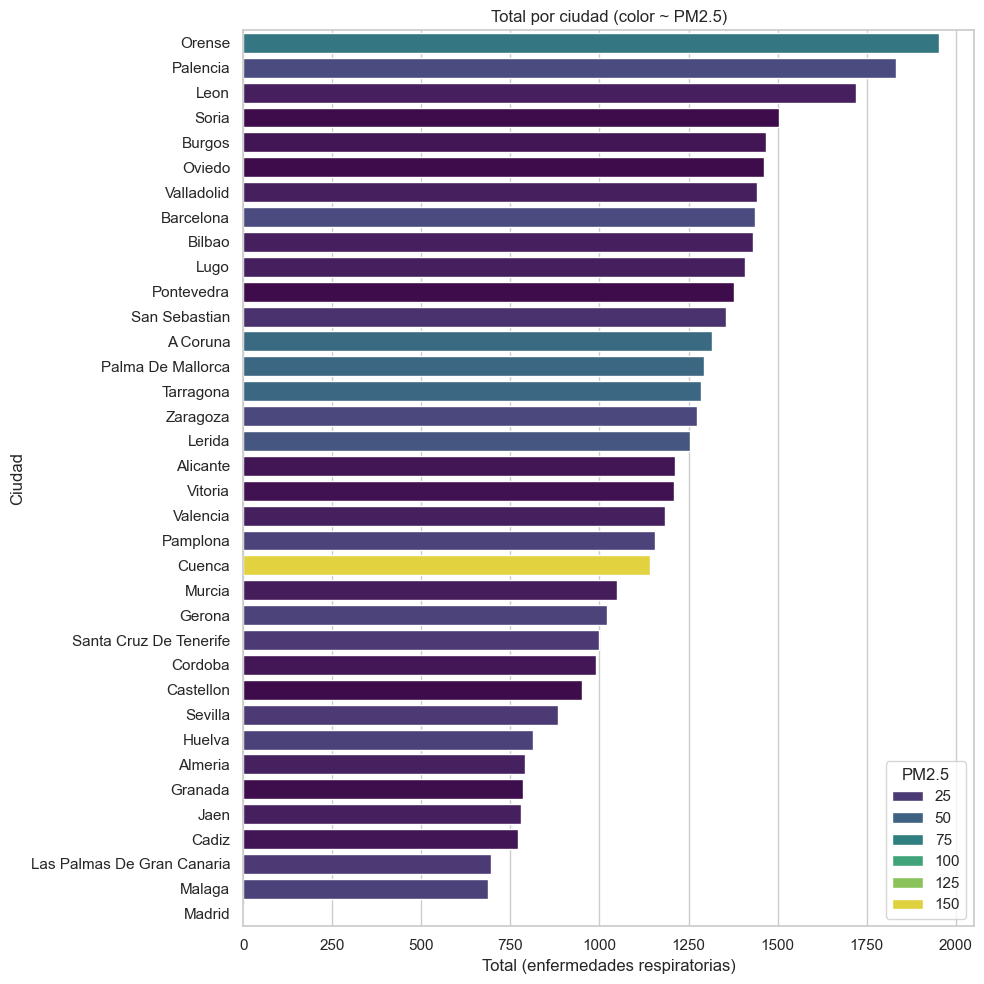

In [16]:
df_rank = df_plot.sort_values("total", ascending=False).copy()

plt.figure(figsize=(10, 10))
bar = sns.barplot(
    data=df_rank, y="ciudad", x="total",
    hue="pm25", palette="viridis", dodge=False
)
plt.title("Total por ciudad (color ~ PM2.5)")
plt.xlabel("Total (enfermedades respiratorias)")
plt.ylabel("Ciudad")
plt.legend(title="PM2.5", loc="lower right")
plt.tight_layout()
plt.show()

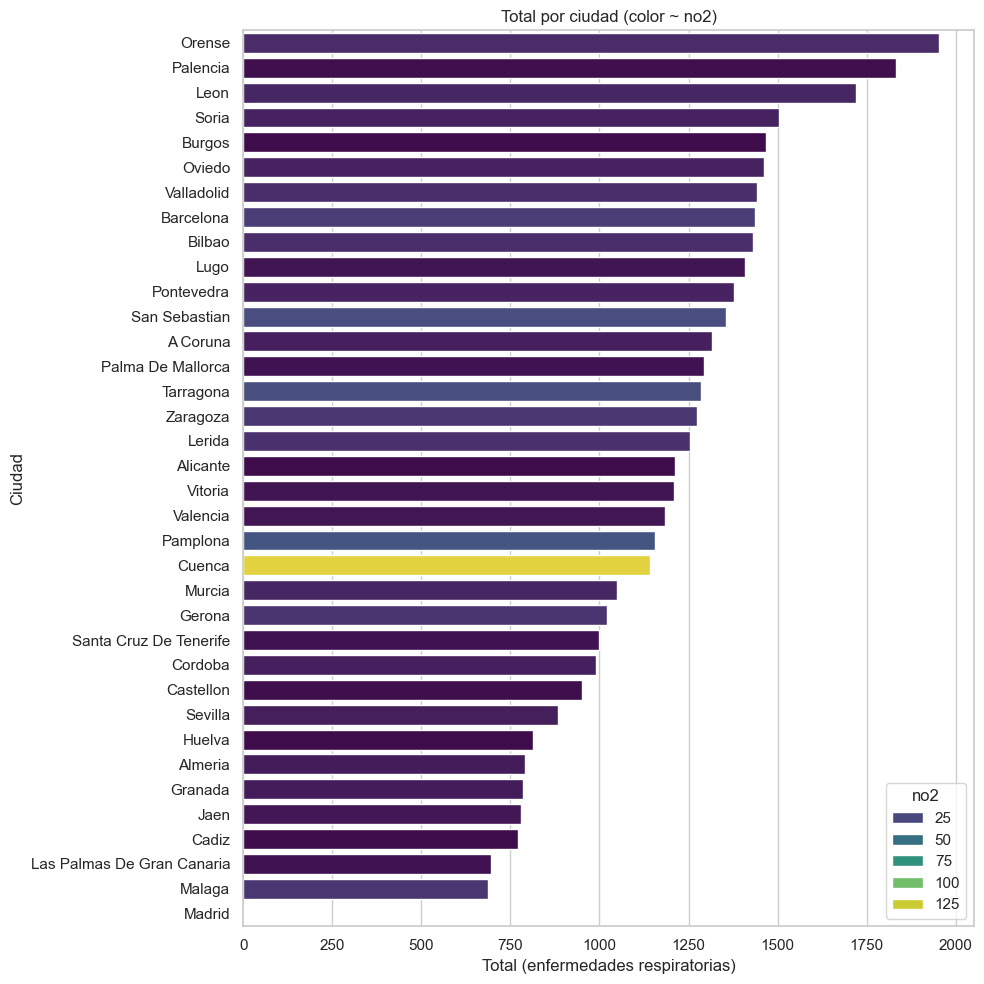

In [17]:
df_rank = df_plot.sort_values("total", ascending=False).copy()

plt.figure(figsize=(10, 10))
bar = sns.barplot(
    data=df_rank, y="ciudad", x="total",
    hue="no2", palette="viridis", dodge=False
)
plt.title("Total por ciudad (color ~ no2)")
plt.xlabel("Total (enfermedades respiratorias)")
plt.ylabel("Ciudad")
plt.legend(title="no2", loc="lower right")
plt.tight_layout()
plt.show()